# Backstage

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm
# import pprint

import math

import scipy.stats as st

In [ ]:
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (22, 9)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 15
plt.rcParams['font.sans-serif'] = ['Verdana', 'Lucida Sans', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams.keys()

In [ ]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# OneMax

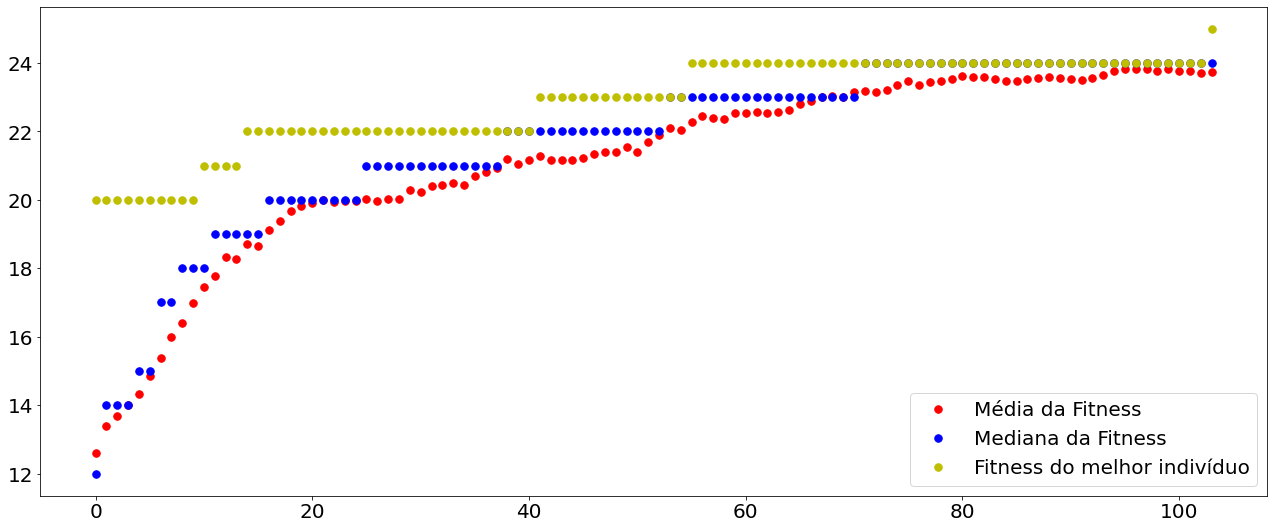

In [ ]:
from contextlib import redirect_stdout

with open('output.txt', 'a') as f:
    with redirect_stdout(f):
        

        NUM_GER = 200
        NUM_X = 1
        TAM_POP = 250
        TAM_CRO = 25
        SIZE = (TAM_POP, TAM_CRO)
        CROSS_TAX = 0.125
        MUT_TAX = 0.02
        ELITISM = 26

        seeds = np.random.randint(0, 2**32, NUM_X)

        ttotal_gerações = 0

        soluções_encontradas = 0

        fitness_melhor = 0

        for n1 in range(NUM_X):
            chave = False
            np.random.seed(seeds[n1])
            #np.random.seed(314)
            
            # Geração da população inicial

            #np.random.default_rng()

            população = np.zeros(SIZE, dtype = int)

            mask = np.random.rand(*SIZE) >= .5

            população[mask] = 1

            população = população[np.sum(população, axis = 1).argsort(axis = 0)[::-1]]

            fitness = np.sum(população, axis = 1).reshape(TAM_POP, 1)
            #print("Geração inicial", n1 + 1, ":", população[0])
            #print("Fitness inicial", n1 + 1, ":", fitness[0, 0])

            total_gerações = 0

            z = 0

            # Plottando o gráfico
            #plt.plot(z, np.sum(fitness), 'r.', label = "Soma da Fitness")
            plt.plot(z, np.mean(fitness), 'r.', label = "Média da Fitness")
            plt.plot(z, np.median(fitness), 'b.', label = "Mediana da Fitness")
            plt.plot(z, fitness[0, 0], 'y.', label = "Fitness do melhor indivíduo")

            while fitness[0] < TAM_CRO and z < NUM_GER:
            #for z in range(NUM_GER):
                #print("Geração: ", z + 1)
                #print(np.sum(fitness))
                #print(np.mean(fitness))
                #print(np.median(fitness))
                #print("\n")

                # Seleção por roleta
                roleta = fitness / np.sum(fitness)

                pai1 = np.zeros(TAM_CRO)
                pai2 = np.zeros(TAM_CRO)

                populaçãofilhos = np.zeros((TAM_POP - ELITISM, TAM_CRO), dtype = int)

                # Reprodução

                j = 0

                while j < TAM_POP - ELITISM:
                    aux = np.random.rand()
                    i = roleta[0, 0].copy()
                    l = 1
                    while i < aux:
                        i += roleta[l, 0]
                        l += 1

                    if i >= 1:
                        pai1 = população[TAM_POP - 1].copy()
                    else:
                        pai1 = população[np.floor(i * TAM_POP).astype(int)].copy()

                    aux = np.random.rand()
                    i = roleta[0, 0].copy()
                    l = 1
                    while i < aux:
                        i += roleta[l, 0]
                        l += 1


                    if i >= 1:
                        pai2 = população[TAM_POP - 1].copy()
                    else:
                        pai2 = população[np.floor(i * TAM_POP).astype(int)].copy()

                    # Crossover Uniforme
                    for i in pai1:
                        if np.random.rand() < CROSS_TAX:
                            aux = pai1[i].copy()
                            pai1[i] = pai2[i].copy()
                            pai2[i] = aux.copy()

                    populaçãofilhos[j] = pai1.copy()
                    populaçãofilhos[j + 1] = pai2.copy()

                    # Mutação de um ponto
                    if np.random.rand() < MUT_TAX:
                        pos = np.random.randint(TAM_CRO)
                        if populaçãofilhos[j, pos] == 0:
                            populaçãofilhos[j, pos] = 1
                        else:
                            populaçãofilhos[j, pos] = 0

                    if np.random.rand() < MUT_TAX:
                        pos = np.random.randint(TAM_CRO)
                        if populaçãofilhos[j + 1, pos] == 0:
                            populaçãofilhos[j + 1, pos] = 1
                        else:
                            populaçãofilhos[j + 1, pos] = 0

                    j += 2

                # Repopulação

                for i in range(TAM_POP - ELITISM):
                    população[i + ELITISM] = populaçãofilhos[i].copy()
                
                #fitness_filhos = np.sum(populaçãofilhos, axis = 1).reshape(TAM_POP - ELITISM, 1)
                
                #for i in range(TAM_POP - ELITISM):
                    #if fitness_filhos[i] > fitness[i + ELITISM]:
                        #população[i + ELITISM] = populaçãofilhos[i].copy()

                população = população[np.sum(população, axis = 1).argsort(axis = 0)[::-1]]

                fitness = np.sum(população, axis = 1).reshape(TAM_POP, 1)

                total_gerações += 1
                z += 1

                if fitness[0] == TAM_CRO and not chave:
                    #print("\n\nResultado encontrado na geração: ", total_gerações, "\n\n")
                    chave = True
                    soluções_encontradas += 1

                # Plottando o gráfico
                #plt.plot(z, np.sum(fitness), 'r.')
                plt.plot(z, np.mean(fitness), 'r.')
                plt.plot(z, np.median(fitness), 'b.')
                plt.plot(z, fitness[0, 0], 'y.')

            #if fitness[0] != TAM_CRO:
                #print("Vencedor", n1 + 1, ":", população[0])
                #print("Fitness", n1 + 1, ":", fitness[0, 0])
                #print("Solução não encontrada.")
            #print("Total de Gerações", n1 + 1, ":", total_gerações)
            #print("Valor da semente:", seeds[n1])
            #print("\n\n")
            n1 += 1
            ttotal_gerações += total_gerações
            fitness_melhor += fitness[0, 0]

        print("TTotal de Gerações:", ttotal_gerações)
        print("Média de Gerações:", ttotal_gerações / NUM_X)
        print("Resultados encontrados:", soluções_encontradas)
        print("Média de Fitness do melhor indivíduo:", fitness_melhor / NUM_X)
        print()

plt.legend(loc = 'lower right')
plt.show()